In [11]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [12]:
import joblib
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                    StratifiedKFold,
                                    cross_validate
                                )
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve
                        )

warnings.filterwarnings('ignore')

#### Loading Data

In [13]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

#### Configure K-fold CV

In [15]:
cv = StratifiedKFold(
                    n_splits=6,
                    shuffle=True,
                    random_state=42
                )

In [16]:
trained_models = {}

for model_name, model in models.items():
    print(f'\nCross Validation on {model_name}')

    cv_results = cross_validate(
                                model,
                                X_train,
                                Y_train,
                                cv=cv, scoring='f1',
                                return_estimator=True,
                                return_train_score=True
                            )
    
    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator



Cross Validation on Logistic Regression

Cross Validation on Decision Tree

Cross Validation on Random Forest


In [17]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

In [18]:
Y_hat_tests = {}

for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

{'Logistic Regression': array([1, 0, 0, ..., 0, 0, 1], shape=(1409,)),
 'Decision Tree': array([1, 0, 0, ..., 0, 0, 0], shape=(1409,)),
 'Random Forest': array([1, 0, 0, ..., 0, 0, 0], shape=(1409,))}

In [19]:
for model_name, prediction in Y_hat_tests.items():
    print(f'\nScores for {model_name}')

    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction)
    recall = recall_score(Y_test, prediction)
    f1 = f1_score(Y_test, prediction)

    print(f'Accuracy : {accuracy}')
    print(f'precision : {precision}')
    print(f'recall : {recall}')
    print(f'f1_score : {f1}')


Scores for Logistic Regression
Accuracy : 0.7672107877927609
precision : 0.5436893203883495
recall : 0.7506702412868632
f1_score : 0.6306306306306306

Scores for Decision Tree
Accuracy : 0.730305180979418
precision : 0.49213483146067416
recall : 0.5871313672922251
f1_score : 0.5354523227383863

Scores for Random Forest
Accuracy : 0.7785663591199432
precision : 0.5788113695090439
recall : 0.6005361930294906
f1_score : 0.5894736842105263


In [20]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

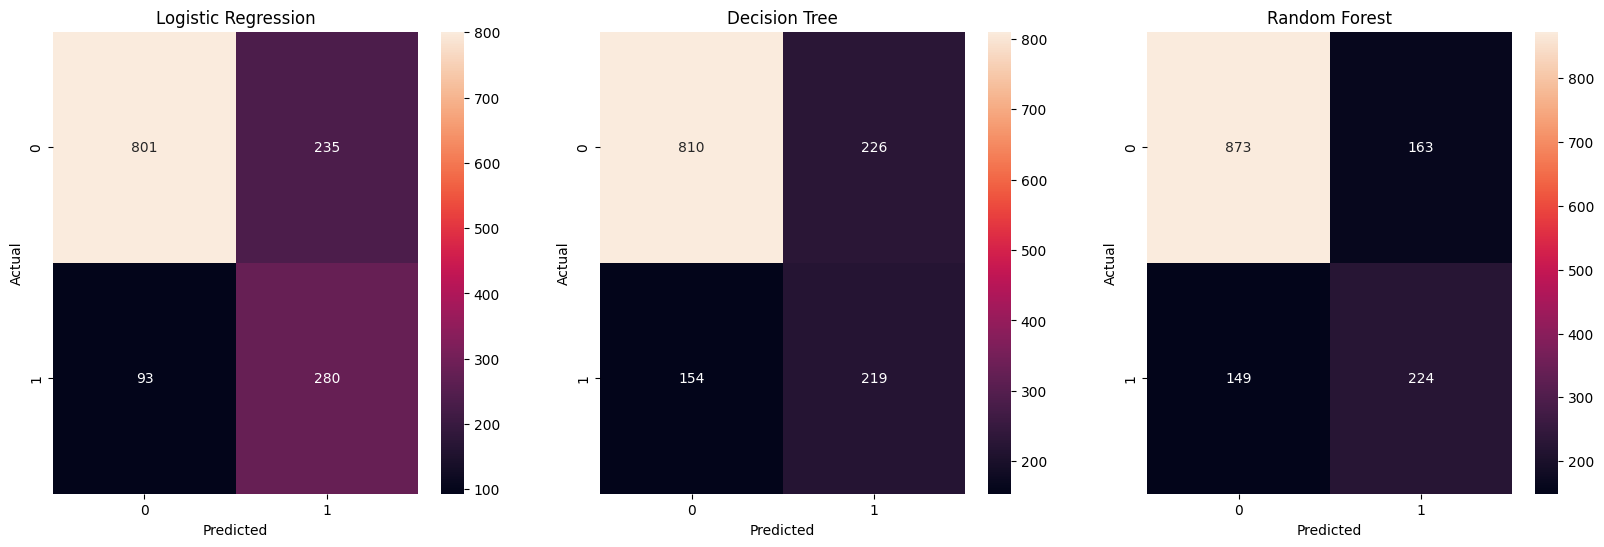

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

plt.show()